In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Frequency (Hz)')

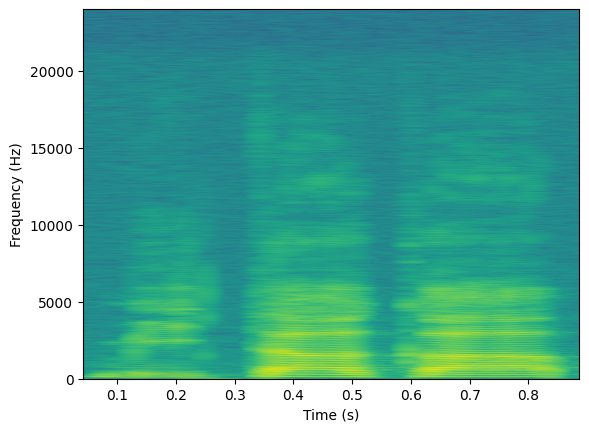

In [2]:
import librosa  # 音声処理ライブラリ（wav の読み込みなどに使用）
import numpy as np  # 数値計算ライブラリ（窓関数などの生成に使用）
import matplotlib.pyplot as plt  # グラフ描画用ライブラリ

# =========================================================
# 1. 音声ファイルの読み込み
# =========================================================
# 'mitaka48k.wav' という音声ファイルを読み込む。
# sr=None とすることで、ファイルに記録されている元のサンプリングレートを維持する。
# yMitaka: 波形データ（1次元の numpy 配列、モノラル）
# sr      : サンプリングレート [Hz]（1秒あたりのサンプル数）
yMitaka, sr = librosa.load("mitaka48k.wav", sr=None)

# =========================================================
# 2. スペクトログラム（短時間フーリエ変換）の描画
# =========================================================
# plt.specgram は「短時間フーリエ変換（STFT）」を計算し、
# 結果を 時間 × 周波数 の 2次元パワースペクトルとしてプロットする関数です。
#
# 連続時間信号 x(t) をサンプリングして得られた離散信号 x[n] に対して、
# 一定長 NFFT のフレームごとにフーリエ変換を行い、その時間変化を可視化します。
#
#   ・時間方向の分解能：フレーム長とフレーム間のシフト幅（noverlap）で決まる
#   ・周波数方向の分解能：NFFT およびサンプリングレート sr で決まる
#
# 主な引数の意味は以下の通りです：
#
#   Fs      : サンプリングレート [Hz]
#             → y軸の周波数 [Hz] を正しく計算するために必要です。
#
#   NFFT    : フレームごとの FFT 点数（窓長）
#             → ここでは 4096 点の FFT を使っています。
#             → 周波数分解能は おおよそ sr / NFFT [Hz] になります。
#
#   window  : 各フレームに掛ける窓関数
#             → np.hanning(4096) はハニング窓（ハン窓）を生成しています。
#             → ハニング窓を掛けることで、フレーム端の不連続性を和らげ、
#                スペクトルの「漏れ（spectral leakage）」を抑える効果があります。
#
#   noverlap: フレーム間のオーバーラップ量（サンプル数）
#             → ここでは noverlap = 4096 - 32 としており、
#                「窓長 4096 サンプルのうち 4096-32 サンプルを重ねる」設定です。
#             → つまりフレームのシフト幅（ホップサイズ）は 32 サンプルとなります。
#                ホップサイズ = NFFT - noverlap = 32
#
#             ・ホップサイズが小さいほど：
#                - 時間方向に細かくフレームを切る（時間方向のサンプリングが細かい）
#                - スペクトログラム上の時間軸が「なめらか」になる
#             ・一方で、NFFT 自体が長いので、1フレーム内に長い時間区間が含まれ、
#               個々のフレームの「時間分解能」自体は粗めになります。
#
# 時間軸は「フレームの開始時刻」を秒に換算したもの、
# 周波数軸は 0〜sr/2 [Hz]（ナイキスト周波数まで）がプロットされます。
plt.specgram(
    yMitaka,
    Fs=sr,  # サンプリングレート（周波数軸 [Hz] を正しく取るために指定）
    NFFT=4096,  # 1 フレームあたりの FFT 点数（窓長）
    window=np.hanning(
        4096
    ),  # ハニング窓を適用（端の不連続性を抑えてスペクトル漏れを軽減）
    noverlap=4096
    - 32,  # フレーム間で 4096-32 サンプルを重ねる → ホップサイズは 32 サンプル
)

# =========================================================
# 3. 軸ラベルの設定
# =========================================================
# x軸：時間 [秒]（Time (s)）
# y軸：周波数 [Hz]（Frequency (Hz)）
# これにより、「いつ・どの周波数帯にどれくらいエネルギーがあるか」を
# 直感的に読み取ることができます。
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# もし対話環境（Jupyter ではないスクリプト実行など）で使う場合は、
# 最後に plt.show() を明示的に呼び出してウィンドウ表示する必要があります。
# （Jupyter Notebook では通常、自動的に描画されます）
# plt.show()